Extracting Data

In [1]:
import sklearn as skl
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tsfel
from langchain_groq.chat_models import ChatGroq
Groq_Token = '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'  # Do not share this key with anyone
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

from MakeDataset import X_train, X_test, y_test, y_train
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


## extracting data and slicing it

In [2]:

activities=["Walking","WalkingUp","WalkingDown","Sitting","Standing","Laying"]
initials=["w","wu","wd","si","st","l"]
dfs={}
y_test3=[]
for a in range(len(activities)):
    for i in range(4):
        filename = f"/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/Data Collection/{activities[a]}_{i+1}.csv"
        df=pd.read_csv(filename)
        dfs[f'{initials[a]}{i+1}'] = df
        y_test3.append(a+1)

Slicing out the first 5 seconds

In [3]:
for i in dfs:
    dfs[i]=dfs[i].iloc[500:]

## Reducing frequencies from 100 Hz to 50 Hz

In [4]:
for i in dfs:
    if len(dfs[i])%2!=0:
        dfs[i]=dfs[i].iloc[:-1]

In [5]:
dfs_n={}
for i in dfs:
    df=dfs[i]
    df_n=pd.DataFrame()
    for j in range(0,len(df)-1,2):
        n_row=(df.iloc[j]+df.iloc[j+1])/2
        df_n=pd.concat([df_n,n_row.to_frame().T],ignore_index=True)
    dfs_n[f'{i}_n'] = df_n

Ttrimming the meaningful 10 secs of data at 50 Hz 

In [6]:
dfs_t={}
df_l=[]
for i in dfs_n:
    dfs_n[i].drop(['time','atotal'],axis=1,inplace=True)
    dfs_t[f'{i}_t']=dfs_n[i].iloc[:500]
    df_l.append(dfs_t[f'{i}_t'])


In [7]:
My_X_test=np.stack(df_l,axis=0)
print(My_X_test.shape)

(24, 500, 3)


# Questions

## 1. Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed. Report the accuracy, precision, recall and confusion matrix of the model.
 

In [8]:
My_X_test_rs=My_X_test.reshape(24,1500)

### Normalising Data

In [9]:
My_X_test_f=My_X_test.reshape(-1,3)
print(My_X_test_f.shape)
scaler=StandardScaler()
My_X_test_f_n=scaler.fit_transform(My_X_test_f)
My_X_test_n_rs_3d=My_X_test_f_n.reshape(24,500,3)
My_X_test_n_rs=My_X_test_n_rs_3d.reshape(24,1500)

(12000, 3)


The Normalising of data is done with respect to its own mean and Standard Deviation as the scale of values of the data collected by us is  different compared to that of training data used for training the model.

### Using DT1

#### Using Gini

Accuracy :  25.0%
Precision :  18.571428571428573%
Recall :  25.0%


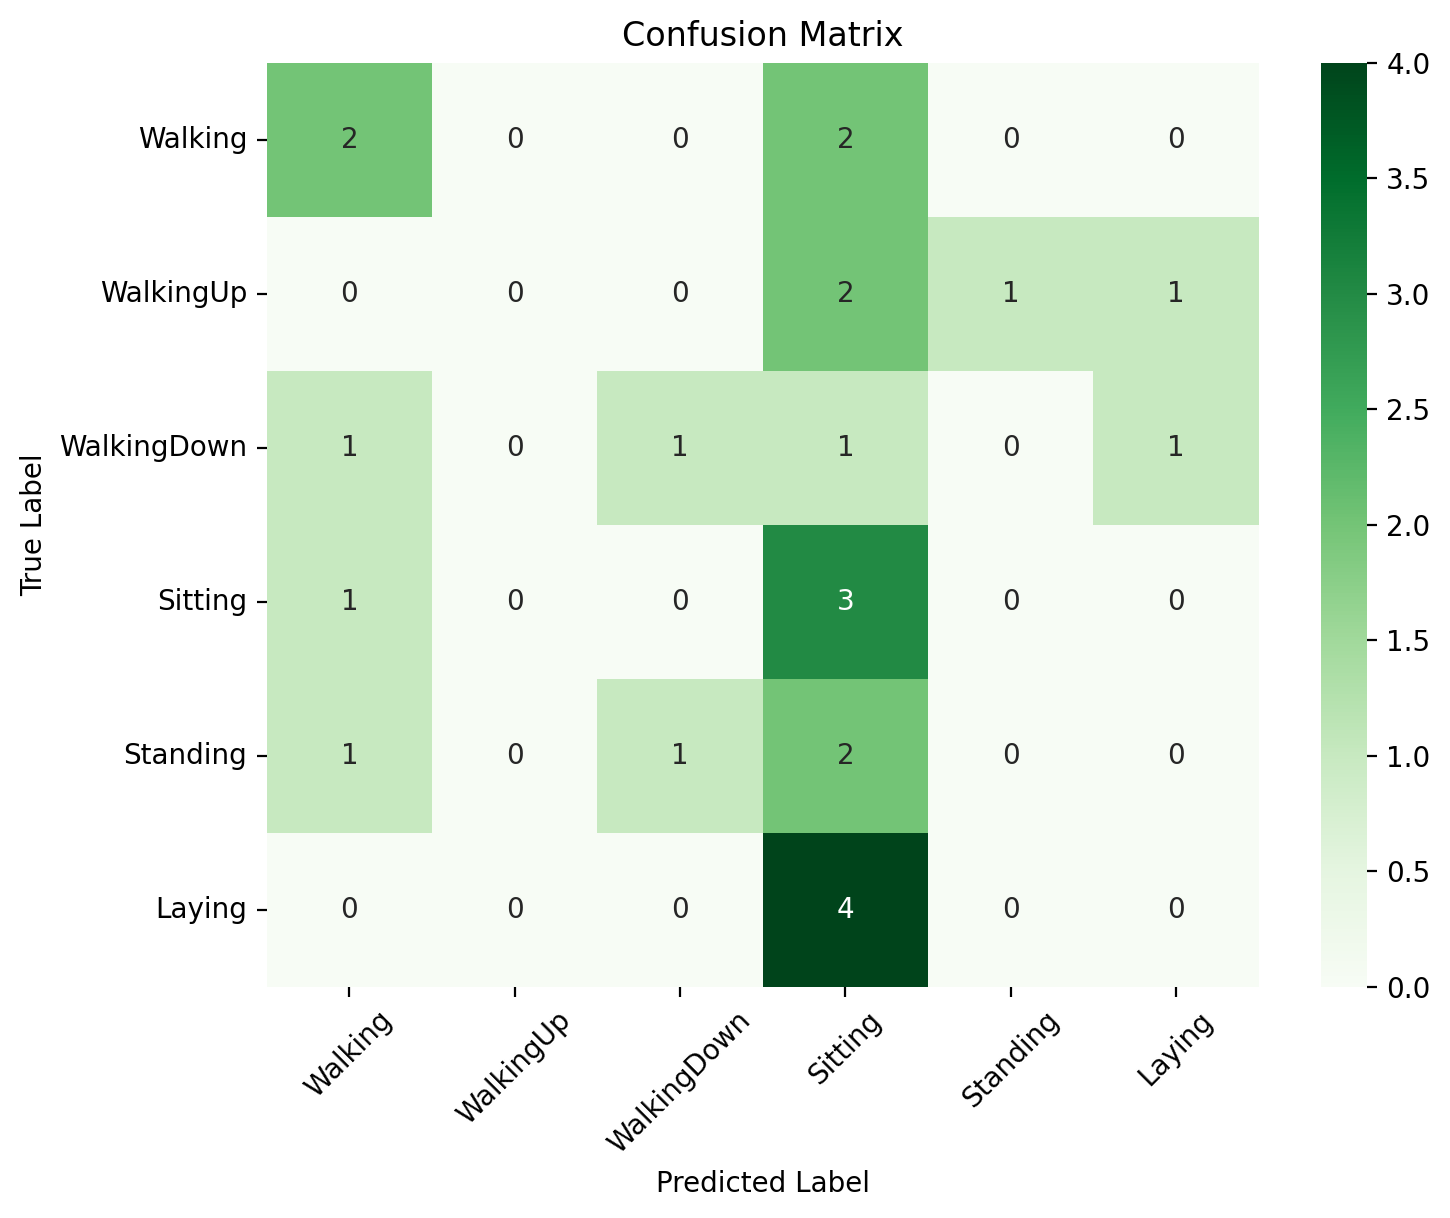

In [10]:
dt1_g=joblib.load('/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/t2_dt1_g.pkl')
y_hat=dt1_g.predict(My_X_test_n_rs)
a=skl.metrics.accuracy_score(y_test3,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test3,y_hat,average='macro',zero_division=0)
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test3,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test3,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Accuracy :  16.666666666666664%
Precision :  7.380952380952381%
Recall :  16.666666666666664%


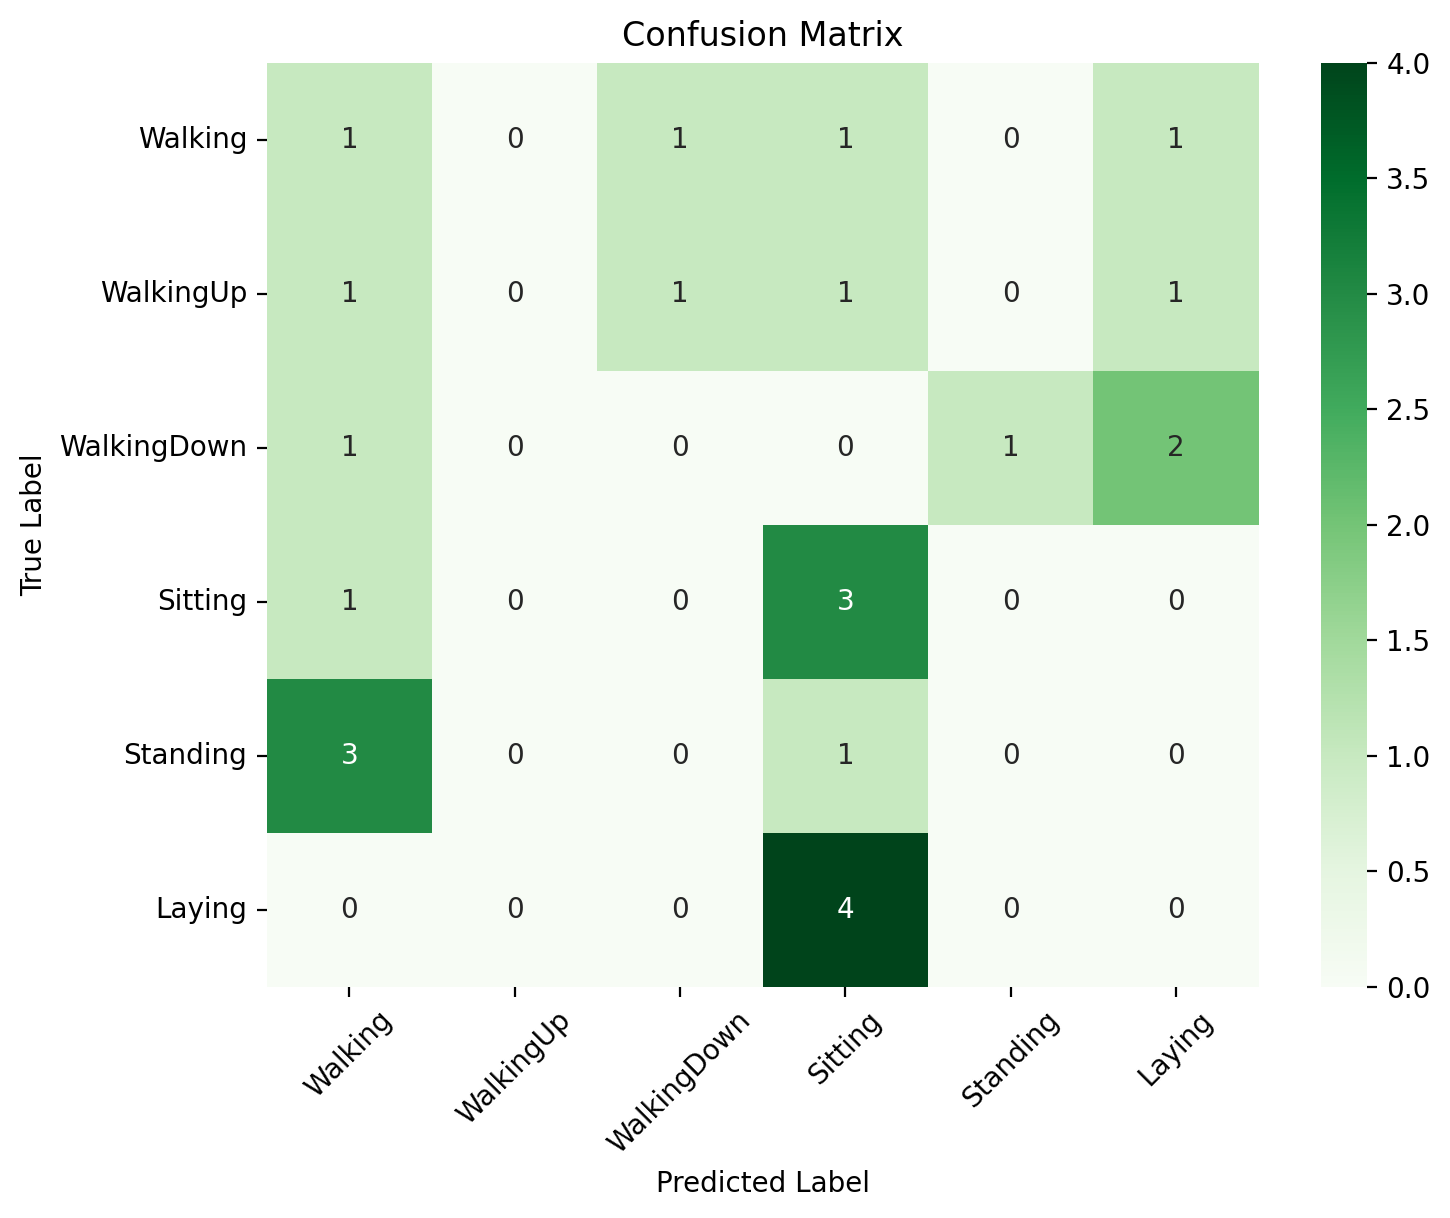

In [11]:
dt1_e=joblib.load('/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/t2_dt1_e.pkl')
y_hat=dt1_e.predict(My_X_test_n_rs)
a=skl.metrics.accuracy_score(y_test3,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test3,y_hat,average='macro',zero_division=0)
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test3,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test3,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## How did the model perform? And which Model was used?

The model used was the Descision Tree 1 which was the model trained through the Raw data the reason being that the data collected by us has the same features(Acceleration in x,y and z directions).

The model performed very poorly.
the probable reasons for the poor performance are:
1. **Logistic Difference**: The data used for training the model is recorded in lab setting i.e. with proper accesories whereas the data collected by us is done by holding the phone in hand.
2. **Human Error**: as the phone was held in hands the vibration of hands might have disturbed the data resulting in confusing the model and misclassification.
3. **Elevation Difference**: The step size in the training data might be different compared the step size in the data collected which might lead to misclassification.
4. **Scale Difference**: The Scale of the data collected by us is different than the scale of the training data.
5. **Step Difference**: The type of stairs and the steps of it are different compareed to the stairs where the training data is recorded.

## 2.Use the data you collected to predict the activities that you performed. Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 marks]

The accuracy achieved on the decision tree through raw acceleration data is very low and it could be much more improved thus pre-processing and featurization is needed.

### Extracting TSFEL features for the Data Collected

In [12]:
# creating an array with values of total acceleration
My_x_total_acc = np.sum(My_X_test**2, axis=2)

# creating a custom configuration from the existing statistical domain configuration
cgf_file = tsfel.get_features_by_domain('statistical')
features = ["Max", "Min","Mean", "Median", "Standard deviation", "Variance", "Kurtosis",
            "Skewness", "Root mean square", "Entropy", ]
for i in cgf_file['statistical'].keys():
    if i not in features:
        cgf_file['statistical'][i]['use'] = 'no'

# creating a dataframe to store info after tsfel feature extraction
My_x_tsfel = pd.DataFrame(columns = [None]*40)

# extracting features for each sample, one column at a time
for x in range(24): # choosing one sample
    x_df = pd.DataFrame(My_X_test[x], columns = ['acc_x', 'acc_y', 'acc_z']) # creating dataframe for one sample
    x_df['total_acc'] = My_x_total_acc[x] 
    sample_features_row = [] # creating an empty row
    for column in x_df.columns: # traversing through the 4 columns of the dataset
        extracted_features = tsfel.time_series_features_extractor(cgf_file, x_df[column], verbose=0, fs = 50) 
        sample_features_row.extend(extracted_features.iloc[0].values) # extracting the row of values from the
    My_x_tsfel.loc[x] = sample_features_row # extracted_features dataframe and setting it as a row in My_x_tsfel

#Normalising this data with its own mean and std as the scale of this data is very different compared to the training data
scaler = StandardScaler()
My_x_tsfel_s = scaler.fit_transform(My_x_tsfel)

### Using Gini

Accuracy :  33.33333333333333
Precision :  20.555555555555557%
Recall :  33.33333333333333%


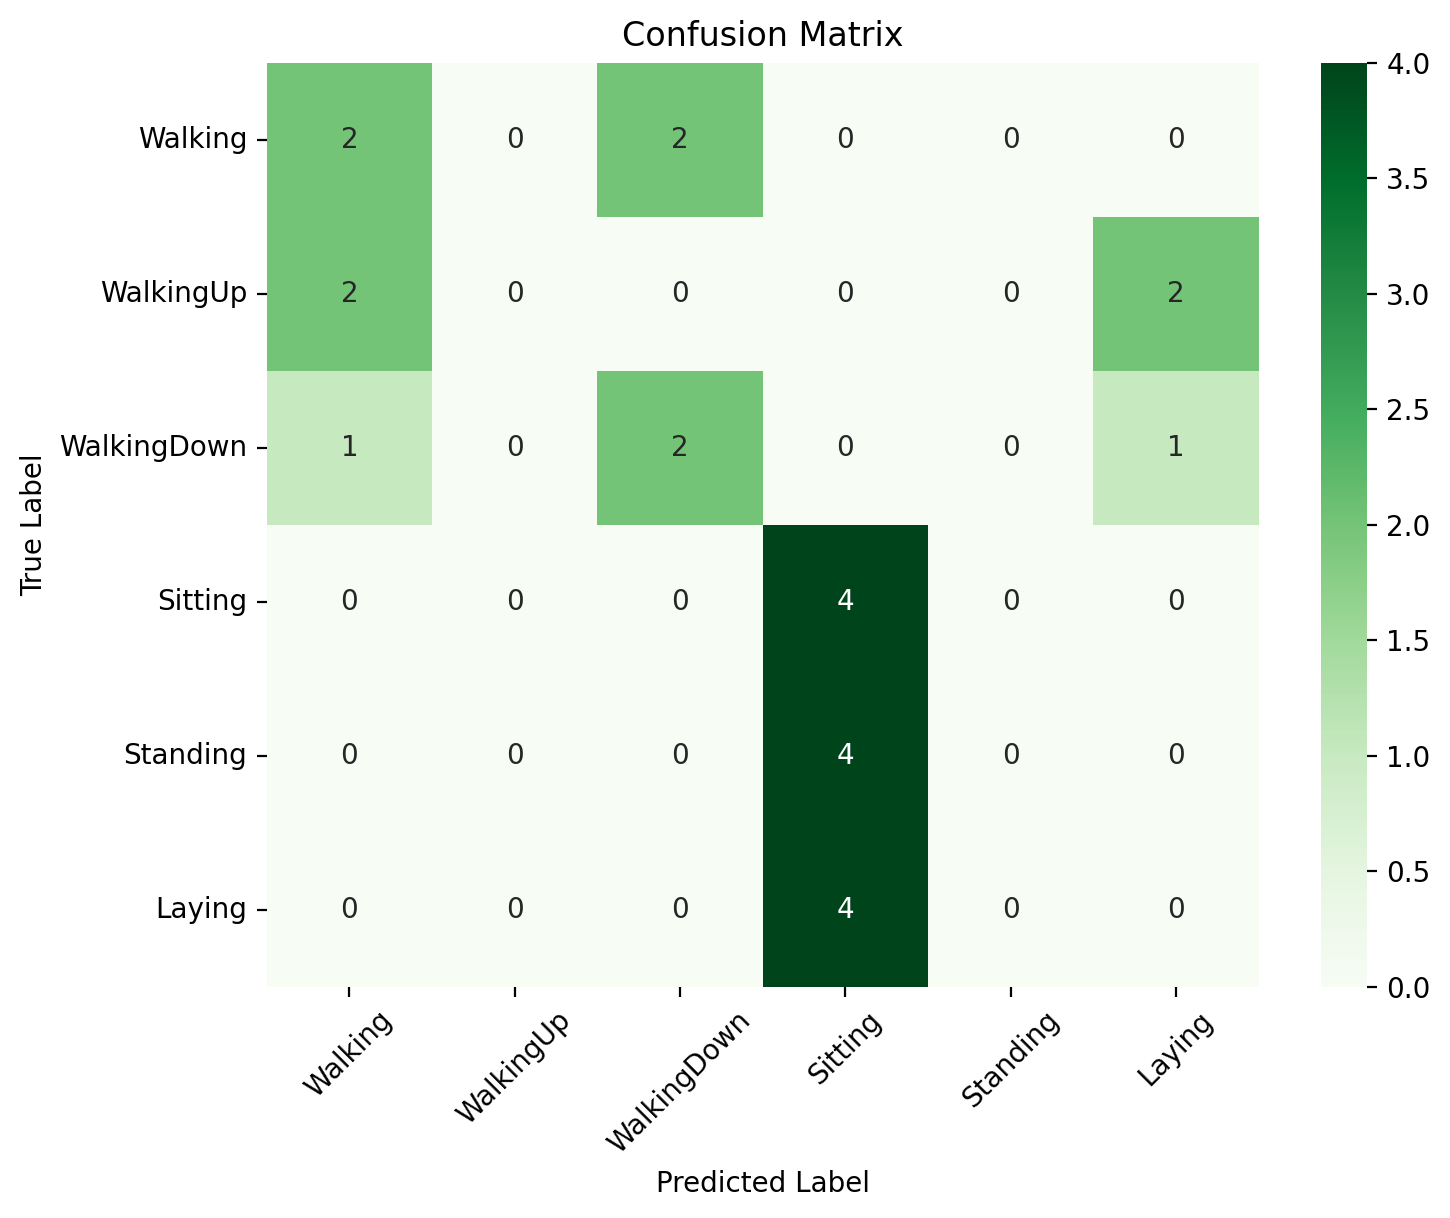

In [13]:
dt2_g=joblib.load('/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/t2_dt2_g.pkl')
y_hat=dt2_g.predict(My_x_tsfel_s)
a=skl.metrics.accuracy_score(y_test3,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",a)
p=skl.metrics.precision_score(y_test3,y_hat,average='macro',zero_division=0)
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test3,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test3,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Using Entropy

Accuracy :  41.66666666666667%
Precision :  33.33333333333333%
Recall :  41.66666666666667%


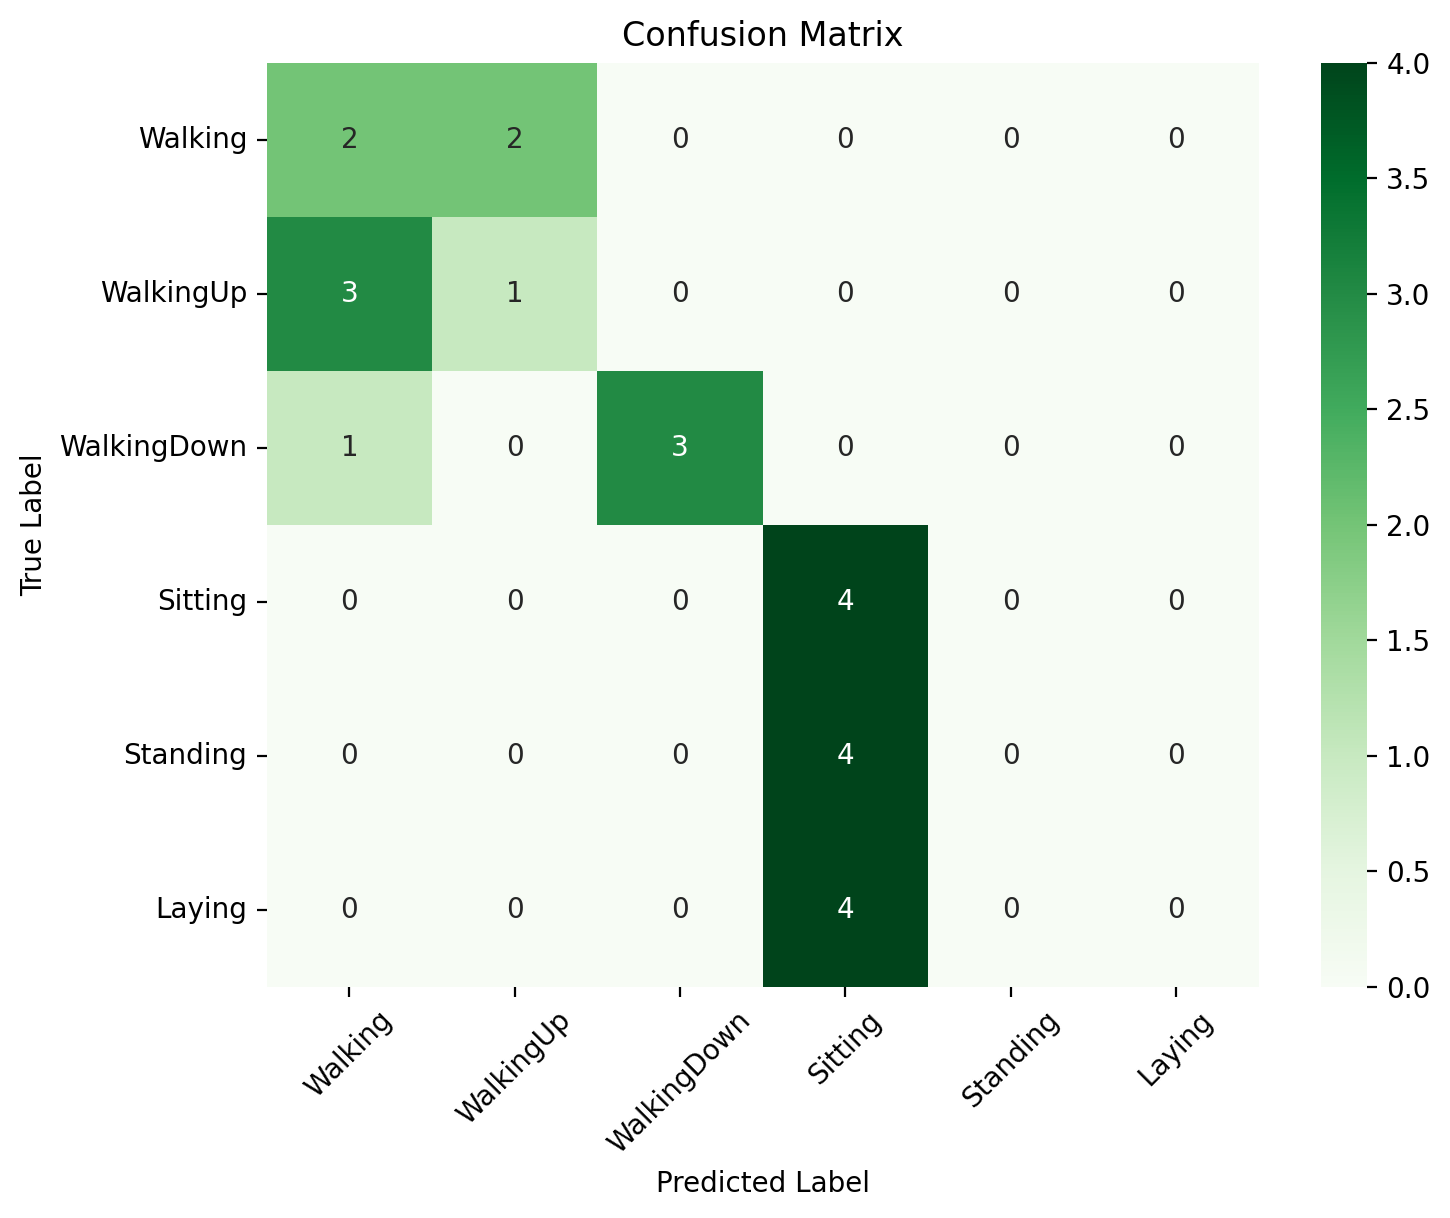

In [14]:
dt2_e=joblib.load('/Users/pranavthakkar/Documents/GitHub/es335-24-fall-assignment-1/t2_dt2_e.pkl')
y_hat=dt2_e.predict(My_x_tsfel_s)
a=skl.metrics.accuracy_score(y_test3,y_hat)
a*=100
str_a=str(a)+'%'
print("Accuracy : ",str_a)
p=skl.metrics.precision_score(y_test3,y_hat,average='macro',zero_division=0)
p*=100
str_p=str(p)+'%'
print("Precision : ",str_p)
r=skl.metrics.recall_score(y_test3,y_hat,average='macro')
r*=100
str_r=str(r)+'%'
print("Recall : ",str_r)
cm=skl.metrics.confusion_matrix(y_test3,y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=activities, yticklabels=activities)
plt.xticks(rotation=45)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### How did it perform

The model performance is much better with accuracy improving greatly. The main reasons behind the improvement of accuracy on pre-processing and Featurisation are:

1. Essentially, a given model is able to predict/classify on the basis of the variance in the data. Hence to understand this very simply, there are two key components, one: the data should be varied across activities and two: the model should be able to *observe* this variance. 
In order to ensure that the data is varied across activities, we need a healthy data collection methodology. Let us assume this is maintained throughout. However, it is difficult for our "raw data model" to be able to observe this variance with our raw data. On the other hand, TSFEL is a featurization library that ensures to highlight these variances. Hence, the variances' trend generated for TSEFL data on UCI HAR can be assumed to be co-related to the variances' trend on our Dataset. Hence, it is easier for the "tsefl model" to observe it easily, hence, gives a better accuracy after featurization.



## 3. Use the Few-Shot prompting method using UCI-HAR dataset to predict the activities that you performed. Ensure that both your examples and test query undergo similar preprocessing. How did the model perform? **[1 marks]**

In [15]:
reshaped_x_train = X_train.reshape(126,1500)
x_train_df = pd.DataFrame(reshaped_x_train)
y_train_df = pd.Series(y_train)
x_train_df['class'] = y_train_df
x_train_csv = x_train_df.to_csv()



In [16]:
activity_numbers = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}


In [17]:
X_train_f=X_train.reshape(-1,3)
X_test_f=X_test.reshape(-1,3)

In [18]:
scaler=StandardScaler()
X_train_f_n=scaler.fit_transform(X_train_f)
X_test_f_n=scaler.transform(X_test_f)
X_train_n_3d=X_train_f_n.reshape(126,500,3)
X_train_f_n_rs=X_train_n_3d.reshape(126,1500)
X_test_n_3d=X_test_f_n.reshape(54,500,3)
X_test_f_n_rs=X_test_n_3d.reshape(54,1500)


In [19]:
x=X_train_f_n_rs
y=y_train
xt=X_test_f_n_rs
yt=y_test

In [37]:
def freq_red(df):
    mean_df = pd.DataFrame()

    for i in range(0, df.shape[1], 500):
        # Taking the mean of every 500 columns
        mean_cols = df.iloc[:, i:i+500].mean(axis=1)
        # Appending the new columns to mean_df
        mean_df = pd.concat([mean_df, mean_cols], axis=1)


    return mean_df


In [87]:
xtrain_df=pd.DataFrame(x)
ytrain_df=pd.DataFrame(y)
My_X_test_n_rs_df=pd.DataFrame(My_X_test_n_rs)

xtrain_df_n=freq_red(xtrain_df)
My_test=freq_red(My_X_test_n_rs_df)


xTrain_csv=xtrain_df_n.to_csv()
yTrain_csv=ytrain_df.to_csv()
my_test_csv=My_test.to_csv()


In [75]:

My_test.shape


(126, 3)

In [91]:
predictions=[]
num_test_splits=6
for i in range(num_test_splits):
    lot_size = 24//num_test_splits
    mytest_split = My_test[lot_size*i:lot_size*(i+1)].to_csv()
    

    query = f'''
    You are a human activity recognition model. Your task is to train a decision tree classifier based on the provided data.

    The training data consists of 126 samples, each with 3 features. The corresponding classifications for these samples are provided in the `y_training` data.
    Train a decision tree based on this training data and then use it to predict outcomes on a test data csv where each line of the total 24 consists of one activity to be predicted.
    ** Output ** Give only 24 predicted activity labels as a single line of space-separated integers. Ensure the output contains exactly 24 labels. Do not include any additional text, explanations, or code.
    **Training Data:**
    {xTrain_csv}

    **Classification of Training Data (y_training data):**
    {yTrain_csv}

    Using the decision tree classifier trained on this data, predict the outcomes for the test set.
    **Predict** the class for each row in the test data, which consists of {lot_size} rows with 3 feature columns.
    **Test Data:**
    {mytest_split}
    '''


    model_name="llama3-70b"
    llm=ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
    answer=llm.invoke(query)
    activities_answer=answer.content.split()
    
    # for i in activities_trim:
    #     i1=int(i)
    #     predictions.append(i1)
    l=len(activities_answer)
    print(activities_answer)



['Here', 'are', 'the', 'predicted', 'class', 'labels', 'for', 'the', 'test', 'data:', '5', '5', '5', '5']
['Here', 'are', 'the', 'predicted', 'class', 'labels', 'for', 'the', 'test', 'data:', '5', '5', '4', '6']
['Here', 'are', 'the', 'predicted', 'class', 'labels', 'for', 'the', 'test', 'data:', '5', '5', '5', '2']
['Here', 'is', 'the', 'predicted', 'class', 'for', 'each', 'row', 'in', 'the', 'test', 'data:', '5', '1', '1', '1']
['Here', 'is', 'the', 'predicted', 'class', 'for', 'each', 'row', 'in', 'the', 'test', 'data:', '5', '3', '5', '1']
['Here', 'are', 'the', 'predicted', 'class', 'labels', 'for', 'the', 'test', 'data:', '3', '3', '3', '3']


Calculating the accuracy

In [83]:
correct_predictions=0
for i in range(54):
    if predictions[i]==yt[i]:
        correct_predictions+=1
accuracy=correct_predictions/54
accuracy*=100
accuracy=round(accuracy,4)
str_acc=str(accuracy)+'%'
print(str_acc)

37.037%


The LLM model didnot perform very well with an accuracy of 37.037% comapared to the decision trees. The accuracies of decision trees varied from 50% to 60% on the raw data. 

## 4. Use the Few-Shot prompting method using the data you collected to predict the activities that you performed. Adopt proper processing methods as needed. How did the model perform? **[1 marks]**